In [2]:
#LIBRERIAS BASICAS    # NO MODIFICAR

from google.colab import files
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
%matplotlib inline

In [ ]:
 FUNCIONES PARA CLUSTERING       # NO MODIFICAR

def normalize(df):
    dfb = df.copy()
    for x in df.columns:
        dfb[x] = (df[x]-df[x].min())/(df[x].max()-df[x].min())
    return dfb   
    
def centroides(a,b):
    res = pd.DataFrame(data=b)
    i=0
    for x in a.columns:
        res.rename(columns={i:x},inplace=True)
        i = i+1
    res.reset_index(inplace=True)
    res.rename(columns={'index':'cluster'},inplace=True)
    return res 
    
def clusteres(a,b): 
    lab = pd.DataFrame(data=b)
    ax = a.join(lab)
    ax.rename(columns={0:'cluster'},inplace=True)  
    return ax

def elbow(X):
    sum_of_squared_distances = []
    K = range(1,15)
    for k in K:
        k_means = KMeans(n_clusters=k)
        model = k_means.fit(X)
        sum_of_squared_distances.append(k_means.inertia_)

    plt.plot(K, sum_of_squared_distances, 'bx-')
    plt.xlabel('k')
    plt.ylabel('sum_of_squared_distances')
    plt.title('elbow method for optimal k')
    plt.show()
    return sum_of_squared_distances

def silhouette(X):
    sil = []
    K = range(2, 15)
    for k in K:
      kmeans = KMeans(n_clusters = k).fit(X)
      labels = kmeans.labels_
      sil.append(silhouette_score(X, labels, metric = 'euclidean'))

    plt.plot(K, sil, 'bx-')
    plt.xlabel('k')
    plt.ylabel('silhouette score')
    plt.title('silhouette method for optimal k')
    plt.show()
    return sil

In [3]:
#DATA LOADING & PREVIEW          # MODIFICAR "url" y asegurarse de usar bien el separador "sep", en este ejemplo es ";"

url = 'https://raw.githubusercontent.com/FramiFlores/Data_Mining/main/clustering_data.csv'
df = pd.read_csv(url,sep=';')
df.head()

,Cliente,Age,Recencia,Frecuencia,Valor
0,1,23,19,1,100
1,2,24,24,1,200
2,3,26,19,1,125
3,4,33,34,6,750
4,5,21,24,1,250


In [4]:
#DATA PREPARATION (VERY IMPORTANT TO DIFFERENTIATE "X" AND "DF")

X = df.drop(columns='Cliente')    # SIEMPRE ELIMINAR CUALQUIER "ID" o VARIABLE QUE NO VAYA ENTRAR AL MODELO
X = normalize(X)        # MIN-MAX ESTANDARIZACION

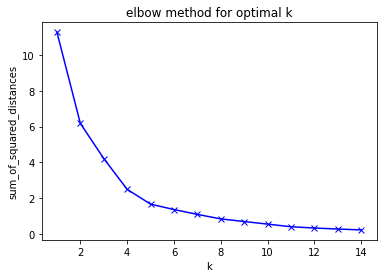

[11.271250923574094, 6.177989690146138, 4.220190910238976, 2.4955579802251138, 1.6732449455291354, 1.3700744210970337, 1.1002430357043527, 0.8476771705192763, 0.7008749322560042, 0.5571632655941081, 0.41020038280833915, 0.33933484280823417, 0.28296336712835723, 0.23363853647358218]


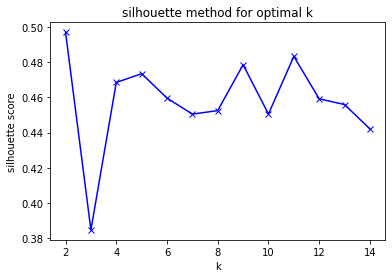

[0.4970165826748994, 0.3846127300952559, 0.4684526941143273, 0.47345613044470375, 0.4595758346640318, 0.45046052971611383, 0.4524633922991408, 0.47853855811719836, 0.4504991316561402, 0.48329065623619977, 0.4591551933927917, 0.45589264751460085, 0.4420305775416936]


In [6]:
# OPTIMAL NUMBER "K" OF CLUSTERS          # NO MODIFICAR

print(elbow(X))
print(silhouette(X))

In [7]:
# ALGORITHM FIT 

kmeans = KMeans(n_clusters=5, random_state=44).fit(X)     # AQUI PRECISAR EL NUMERO DE CLUSTERS "n_clusters"

In [8]:
# CLUSTER CENTROIDS       # NO MODIFICAR

print('Centroides optimos de clusteres')
print(centroides(X,kmeans.cluster_centers_))

Centroides optimos de clusteres
   cluster       Age  Recencia  Frecuencia     Valor
0        0  0.120594  0.027444    0.099174  0.096170
1        1  0.353741  0.358491    0.242424  0.390432
2        2  0.591837  1.000000    0.127273  0.888889
3        3  0.844898  0.211321    0.000000  0.142593
4        4  0.401361  0.320755    0.909091  0.232253


In [9]:
# CLUSTER RESULTS          # NO MODIFICAR

print('Asignacion de clusteres segun cada observacion')     
print(clusteres(df,kmeans.labels_).head())

Asignacion de clusteres segun cada observacion
   Cliente  Age  Recencia  Frecuencia  Valor  cluster
0        1   23        19           1    100        0
1        2   24        24           1    200        0
2        3   26        19           1    125        0
3        4   33        34           6    750        1
4        5   21        24           1    250        0


In [10]:
# EXPORT RESULTS
centroides(X,kmeans.cluster_centers_).to_csv('centroides.csv')          #se puede cambiar nombre del csv si se desea (cambiar en download tmb)
files.download('centroides.csv')

clusteres(df,kmeans.labels_).to_csv('resultados.csv')      #se puede cambiar nombre del csv si se desea (cambiar en download tmb)
files.download('resultados.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>